In [2]:
import pandas as pd

# Carregar o arquivo CSV combinado
df = pd.read_csv('caracteristicas_concatenadas.csv')

In [3]:
# Obter estatísticas descritivas
print(df.describe())


       Número de vértices  Número de arestas  \
count          215.000000         215.000000   
mean           122.674419       19137.790698   
std            153.161194       39517.105596   
min             10.000000          45.000000   
25%             25.000000         300.000000   
50%             50.000000        1225.000000   
75%            150.000000       11175.000000   
max            500.000000      124750.000000   

       Peso médio das arestas por vértice  Número de componentes conexas  \
count                          215.000000                          215.0   
mean                          1969.192967                            1.0   
std                           2774.956237                            0.0   
min                             52.520000                            1.0   
25%                            337.840000                            1.0   
50%                            984.998773                            1.0   
75%                           2113.

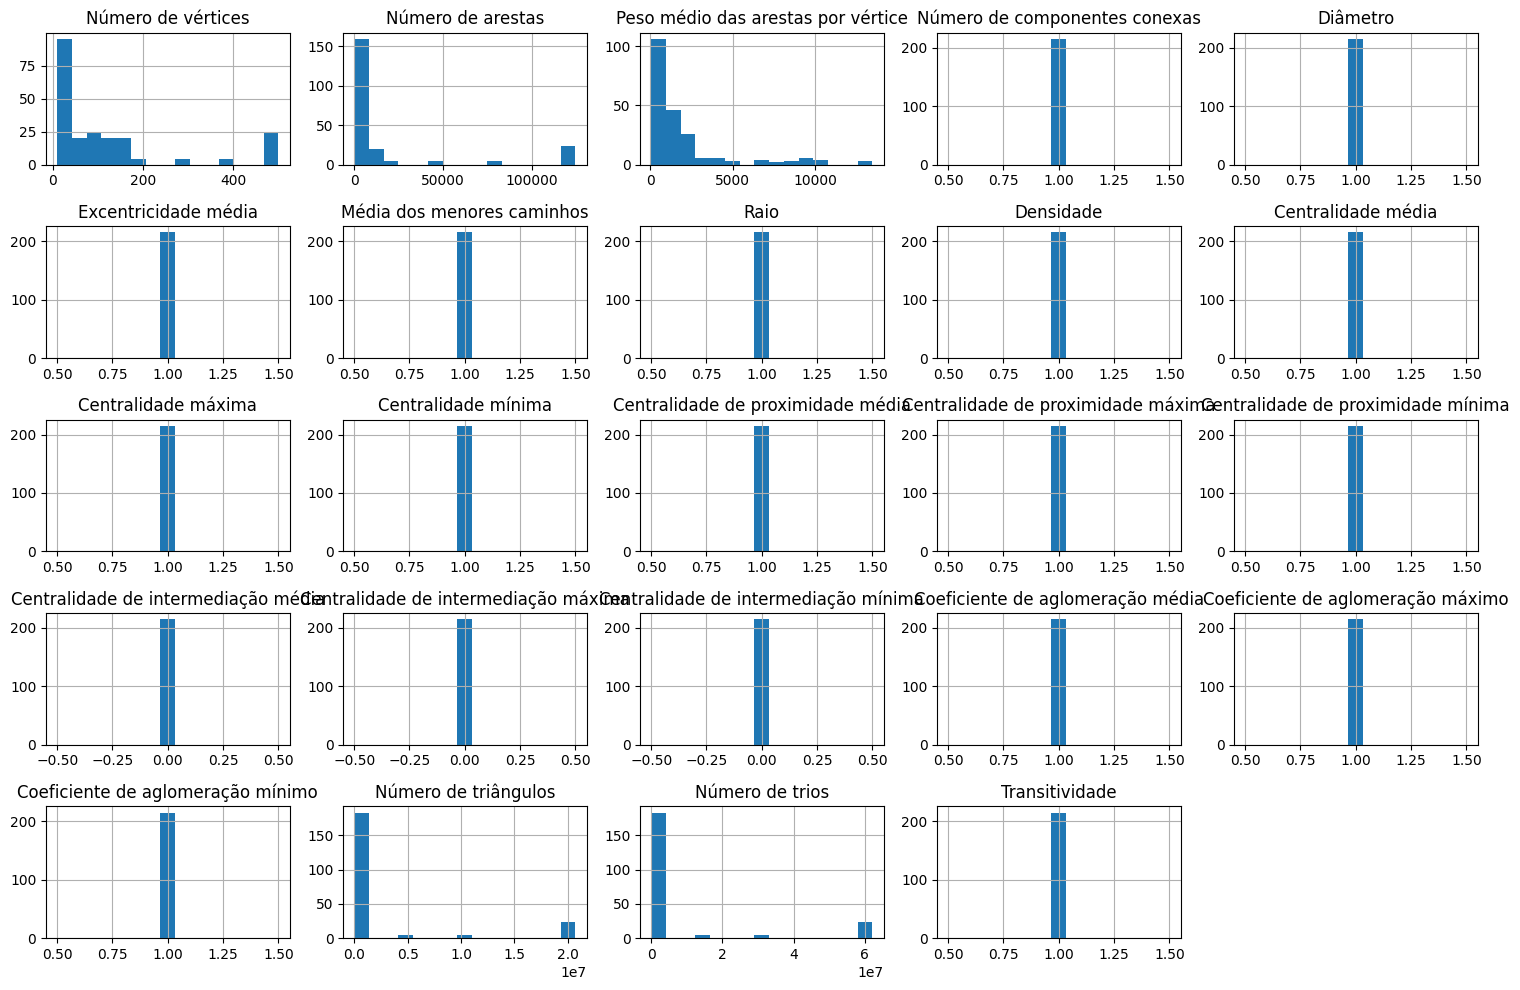

In [4]:
import matplotlib.pyplot as plt

# Criar histogramas para cada característica numérica
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


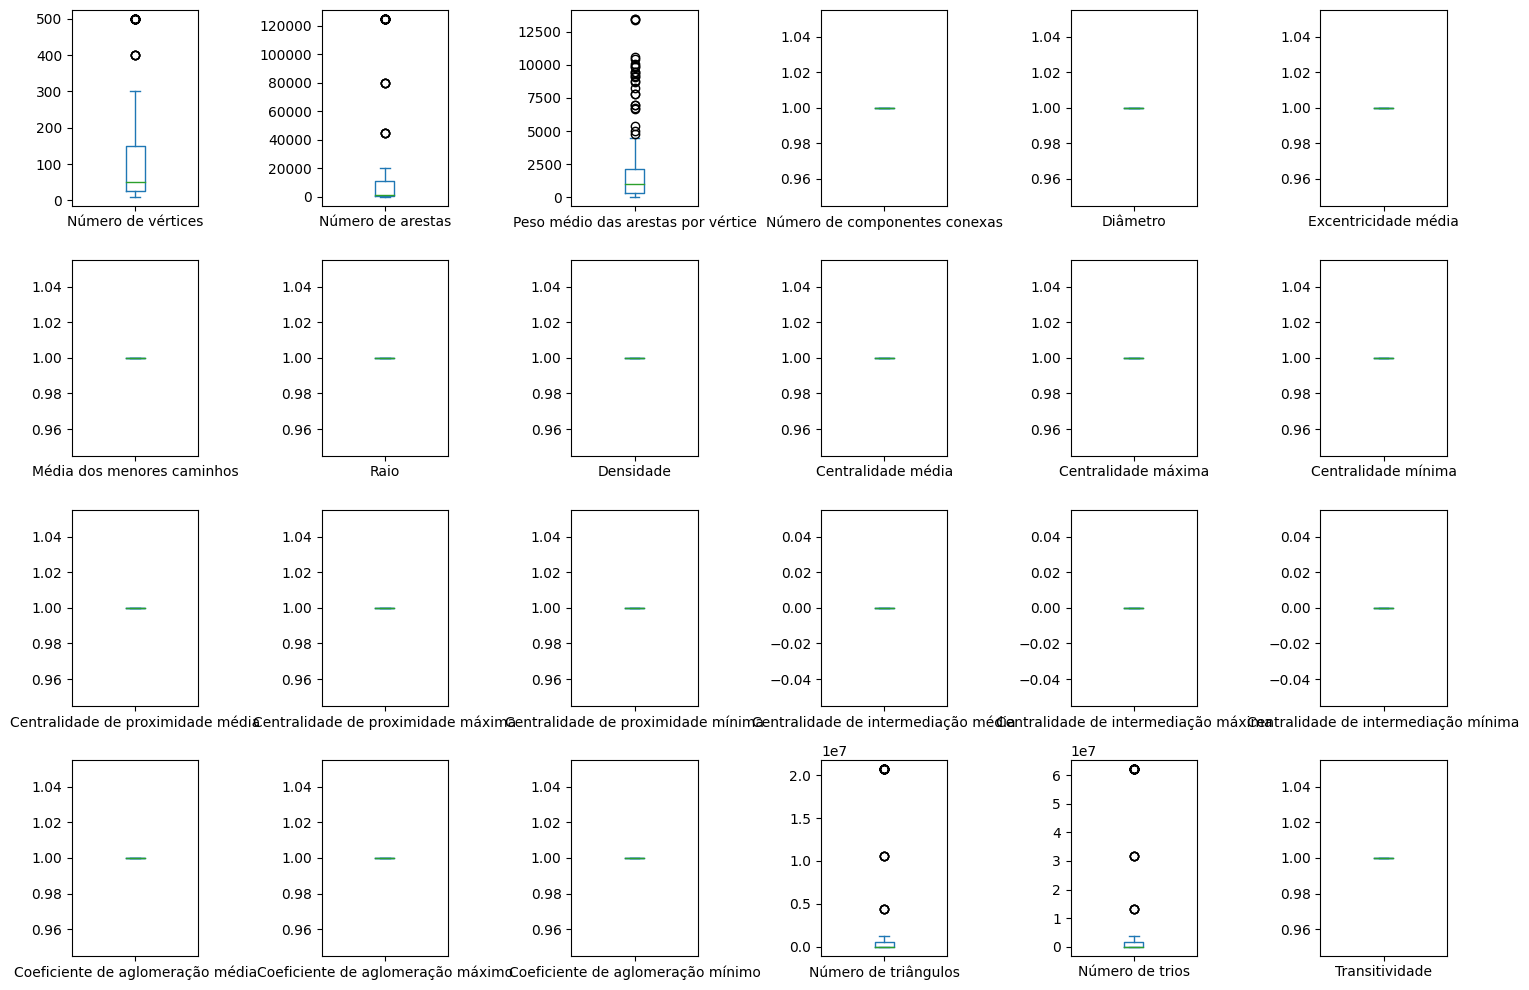

In [5]:
# Criar boxplots para cada característica
df.plot(kind='box', subplots=True, layout=(4,6), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


                                      Número de vértices  Número de arestas  \
Número de vértices                              1.000000           0.969859   
Número de arestas                               0.969859           1.000000   
Peso médio das arestas por vértice              0.018053          -0.076639   
Conexo                                               NaN                NaN   
Número de componentes conexas                        NaN                NaN   
Diâmetro                                             NaN                NaN   
Excentricidade média                                 NaN                NaN   
Média dos menores caminhos                           NaN                NaN   
Raio                                                 NaN                NaN   
Densidade                                            NaN                NaN   
Centralidade média                                   NaN                NaN   
Centralidade máxima                                 

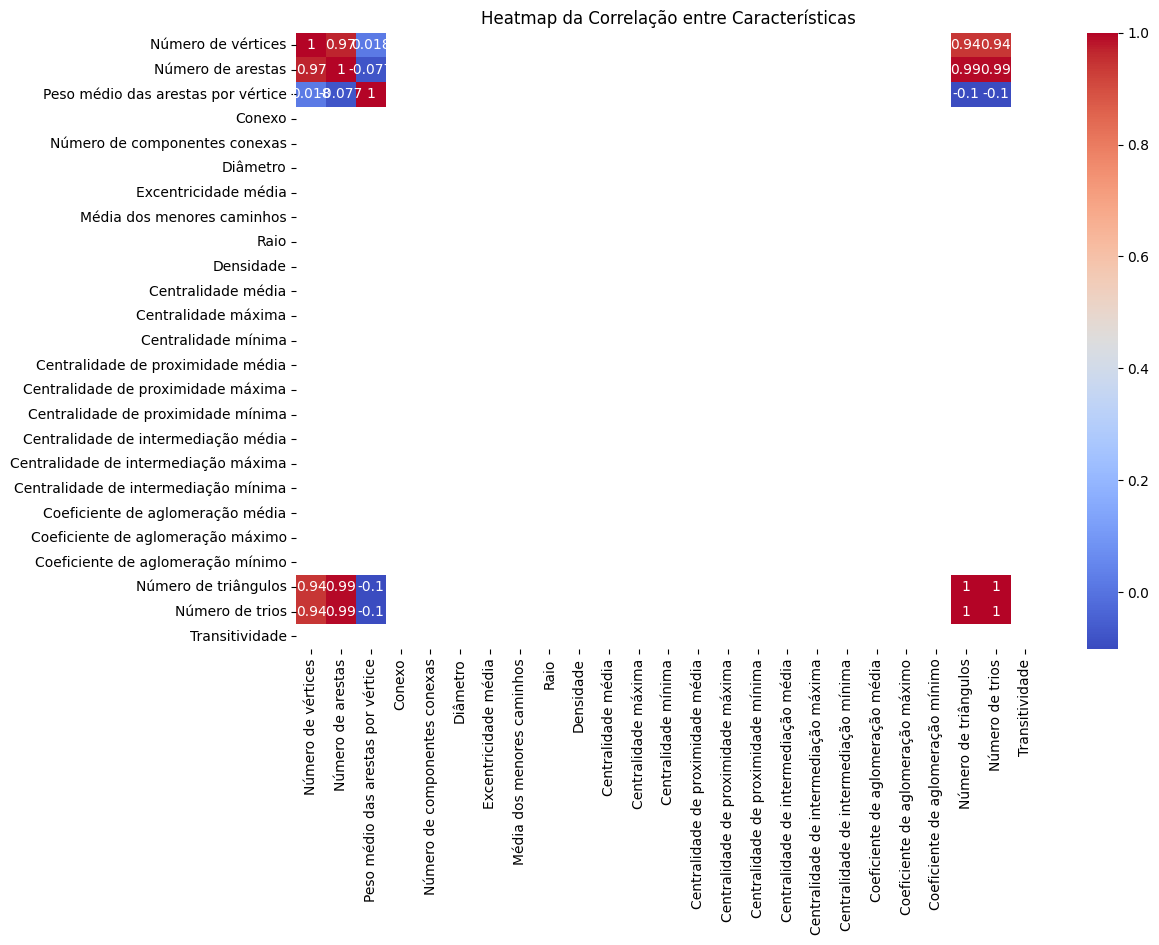

                                      Número de vértices  Número de arestas  \
Número de vértices                              1.000000           0.969859   
Número de arestas                               0.969859           1.000000   
Peso médio das arestas por vértice              0.018053          -0.076639   
Conexo                                               NaN                NaN   
Número de componentes conexas                        NaN                NaN   
Diâmetro                                             NaN                NaN   
Excentricidade média                                 NaN                NaN   
Média dos menores caminhos                           NaN                NaN   
Raio                                                 NaN                NaN   
Densidade                                            NaN                NaN   
Centralidade média                                   NaN                NaN   
Centralidade máxima                                 

In [10]:
# Calcular a matriz de correlação, excluindo a coluna 'Instância'
correlation_matrix = df.drop(columns=['Instância']).corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Criar um heatmap da matriz de correlação
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap da Correlação entre Características")
plt.show()

correlation_matrix.corr()

# Exibir a matriz de correlação
print(correlation_matrix)


In [12]:
# Verificar se há colunas com valores nulos ou constantes
print(df.isnull().sum())  # Verifica o número de valores nulos em cada coluna
print(df.nunique())       # Verifica o número de valores únicos em cada coluna


Instância                               0
Número de vértices                      0
Número de arestas                       0
Peso médio das arestas por vértice      0
Conexo                                  0
Número de componentes conexas           0
Diâmetro                                0
Excentricidade média                    0
Média dos menores caminhos              0
Raio                                    0
Densidade                               0
Centralidade média                      0
Centralidade máxima                     0
Centralidade mínima                     0
Centralidade de proximidade média       0
Centralidade de proximidade máxima      0
Centralidade de proximidade mínima      0
Centralidade de intermediação média     0
Centralidade de intermediação máxima    0
Centralidade de intermediação mínima    0
Coeficiente de aglomeração média        0
Coeficiente de aglomeração máximo       0
Coeficiente de aglomeração mínimo       0
Número de triângulos              

In [14]:
# Remover colunas que têm muitos valores NaN (por exemplo, mais de 50% dos valores são NaN)
df_clean = df.dropna(axis=1, thresh=int(0.5 * len(df)))

# Verificar as colunas restantes
print(df_clean.columns)


Index(['Instância', 'Número de vértices', 'Número de arestas',
       'Peso médio das arestas por vértice', 'Conexo',
       'Número de componentes conexas', 'Diâmetro', 'Excentricidade média',
       'Média dos menores caminhos', 'Raio', 'Densidade', 'Centralidade média',
       'Centralidade máxima', 'Centralidade mínima',
       'Centralidade de proximidade média',
       'Centralidade de proximidade máxima',
       'Centralidade de proximidade mínima',
       'Centralidade de intermediação média',
       'Centralidade de intermediação máxima',
       'Centralidade de intermediação mínima',
       'Coeficiente de aglomeração média', 'Coeficiente de aglomeração máximo',
       'Coeficiente de aglomeração mínimo', 'Número de triângulos',
       'Número de trios', 'Transitividade', 'Cluster'],
      dtype='object')


In [15]:
# Remover colunas que têm o mesmo valor em todas as linhas
df_clean = df_clean.loc[:, df_clean.nunique() > 1]

# Verificar as colunas restantes
print(df_clean.columns)


Index(['Instância', 'Número de vértices', 'Número de arestas',
       'Peso médio das arestas por vértice', 'Número de triângulos',
       'Número de trios', 'Cluster'],
      dtype='object')


                                    Número de vértices  Número de arestas  \
Número de vértices                            1.000000           0.969859   
Número de arestas                             0.969859           1.000000   
Peso médio das arestas por vértice            0.018053          -0.076639   
Número de triângulos                          0.942269           0.994661   
Número de trios                               0.942269           0.994661   
Cluster                                      -0.483016          -0.408147   

                                    Peso médio das arestas por vértice  \
Número de vértices                                            0.018053   
Número de arestas                                            -0.076639   
Peso médio das arestas por vértice                            1.000000   
Número de triângulos                                         -0.100799   
Número de trios                                              -0.100799   
Cluster         

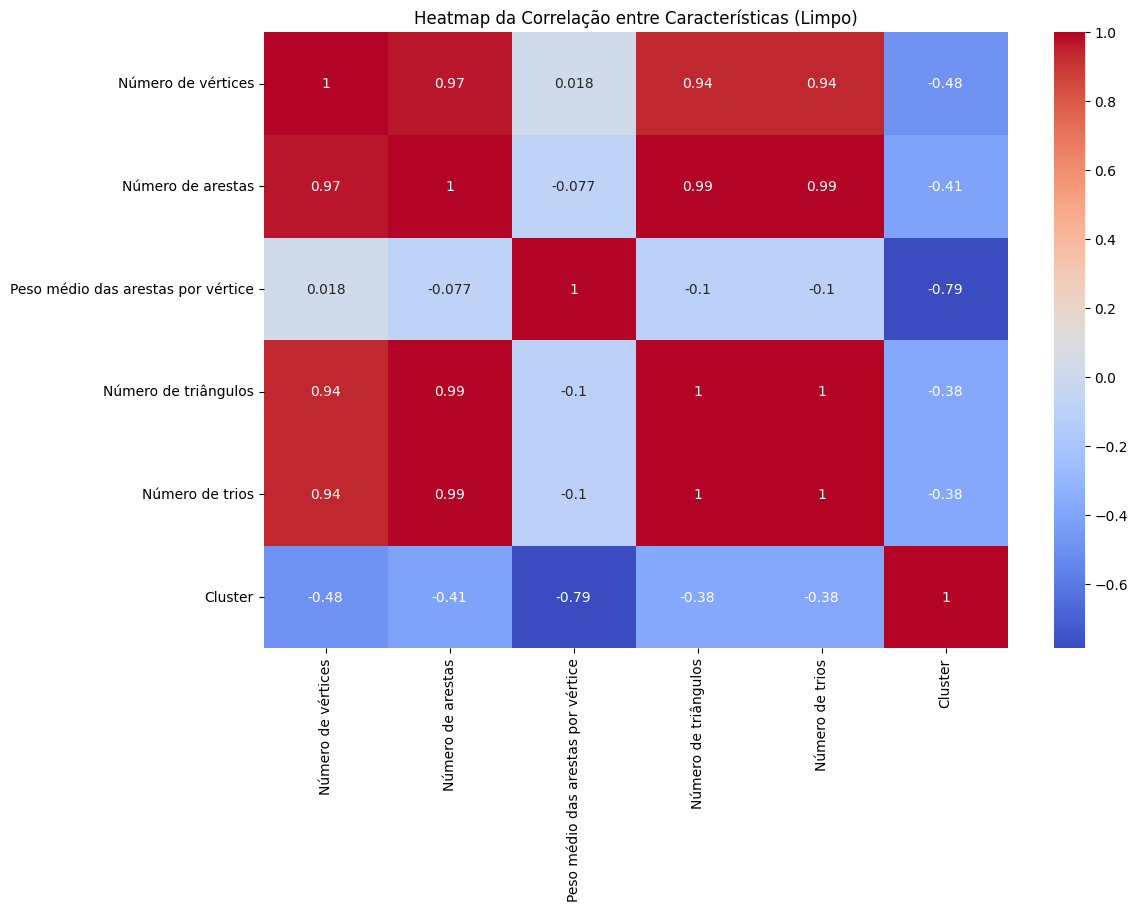

In [17]:
# Calcular a nova matriz de correlação
correlation_matrix_clean = df_clean.drop(columns=['Instância']).corr()

# Exibir a nova matriz de correlação
print(correlation_matrix_clean)

# Criar um heatmap da nova matriz de correlação
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_clean, annot=True, cmap='coolwarm')
plt.title("Heatmap da Correlação entre Características (Limpo)")
plt.show()


C:\Users\Carlos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


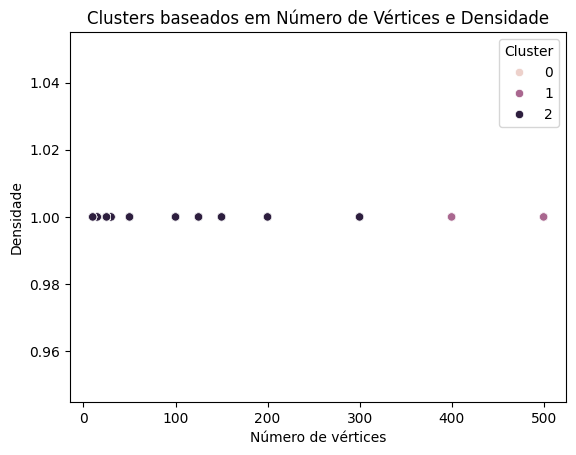

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['Instância']))

# Aplicar k-means para encontrar clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizar a distribuição dos clusters
sns.scatterplot(x=df['Número de vértices'], y=df['Densidade'], hue=df['Cluster'])
plt.title("Clusters baseados em Número de Vértices e Densidade")
plt.show()
